# DATASCI Async Exercise: Health site near you

SALAMANTE, Stephen (S12)

______

## Location Information

My family resides within <b>Metro Manila</b>. While most of my relatives reside within <b>Laguna</b>.

## Import libraries

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading files 

### Shapefile

In [2]:
# Read shapefile
ph = gpd.read_file('./gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


### GeoJSON

In [3]:
# Read GeoJSON file
healthsites = gpd.read_file('./philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


## Overview of the Philippines Map with Health-related Amenities

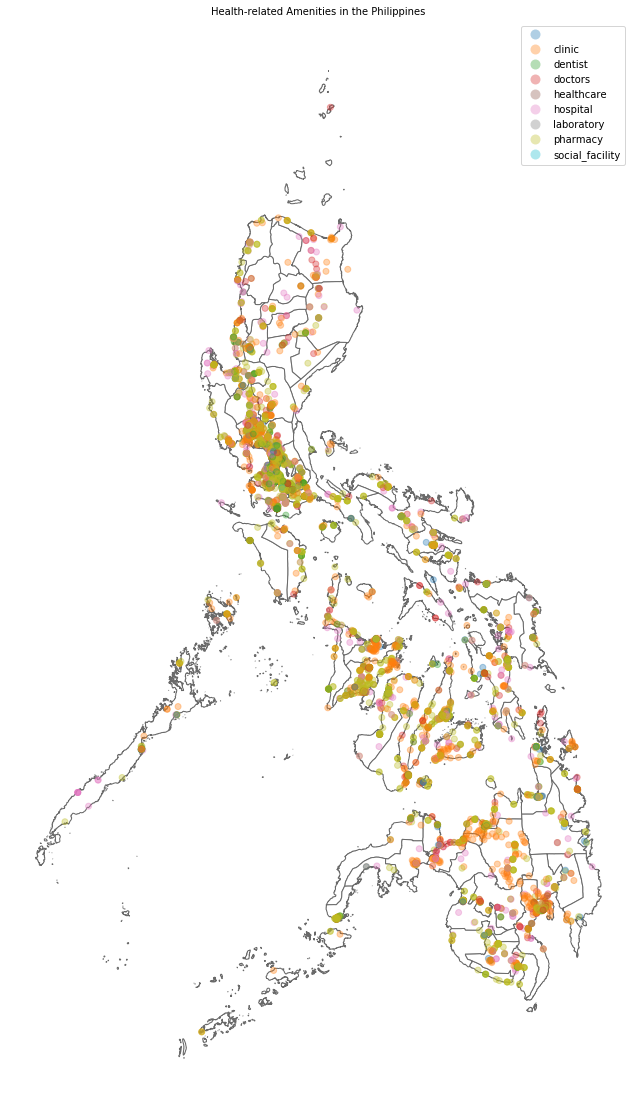

In [4]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=10)
ax.axis('off');

## Extract points from the `healthsites` GeoDataFrame

This is performed to be able to intersect the health-related amenities with the map later on.

In [5]:
# Get points from healtsites geometry
hp_points = healthsites[healthsites.osm_type == 'node']
hp_points.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
5,678983870,node,9.0,,clinic,,,,,4282186.0,...,arivac_bohol,,,,,,,None,None,POINT (123.98877 9.79335)
6,8076834059,node,28.0,,pharmacy,,Magsaysay,Edito Vitug,water_works,93459190.0,...,KristeleH,,,,,pharmacy,private,None,None,POINT (120.56550 14.91256)


## Generate a Metro Manila map with its respective Health-related Amenities

This will be done by intersecting the GeoDataFrames `mm` and `ph` into `mm_hp`.

In [6]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]

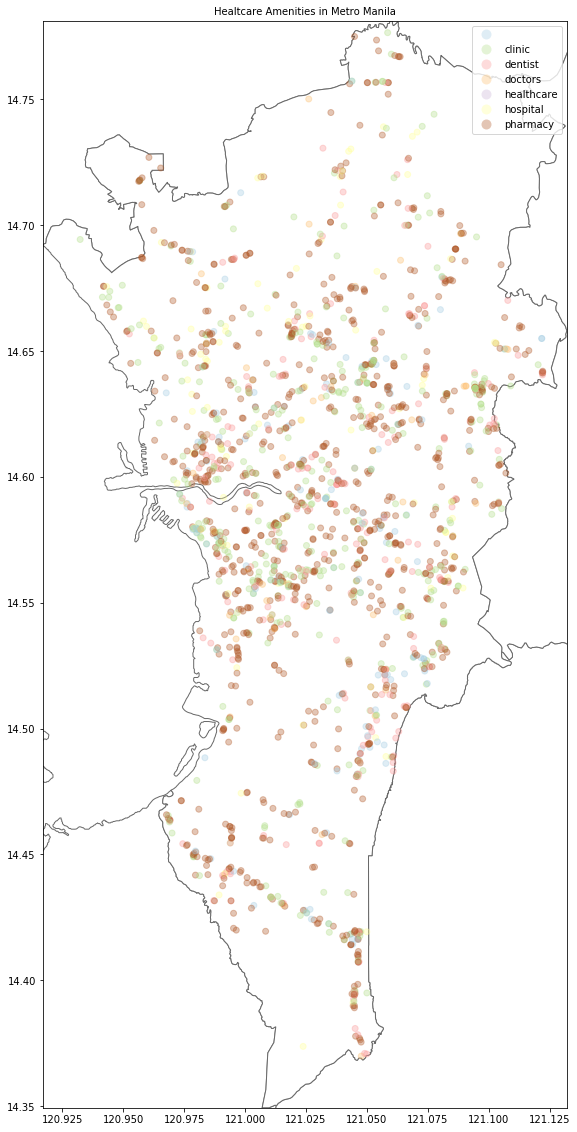

In [7]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.set_title('Healtcare Amenities in Metro Manila', fontsize=10)
ax.set_xlim(mm.bounds.iloc[0]['minx'], mm.bounds.iloc[0]['maxx'])
ax.set_ylim(mm.bounds.iloc[0]['miny'], mm.bounds.iloc[0]['maxy'])
mm_hp = gpd.overlay(hp_points, mm, how='intersection')
ph.plot(ax=ax, color='white', edgecolor='dimgray')
mm_hp.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)

Let's count the number of health-related amenities within Metro Manila by getting the shape of `mm_hp`.

In [8]:
mm_hp[mm_hp.osm_type == 'node'].shape[0]

1781

With this, there are <b>1,781</b> health-related amenities within Metro Manila.

## Generate a Laguna map with its respective Health-related Amenities

This will be done by intersecting the GeoDataFrames `lgn` and `ph` into `lgn_hp`.

In [9]:
lgn = ph[ph.NAME_1=="Laguna"]

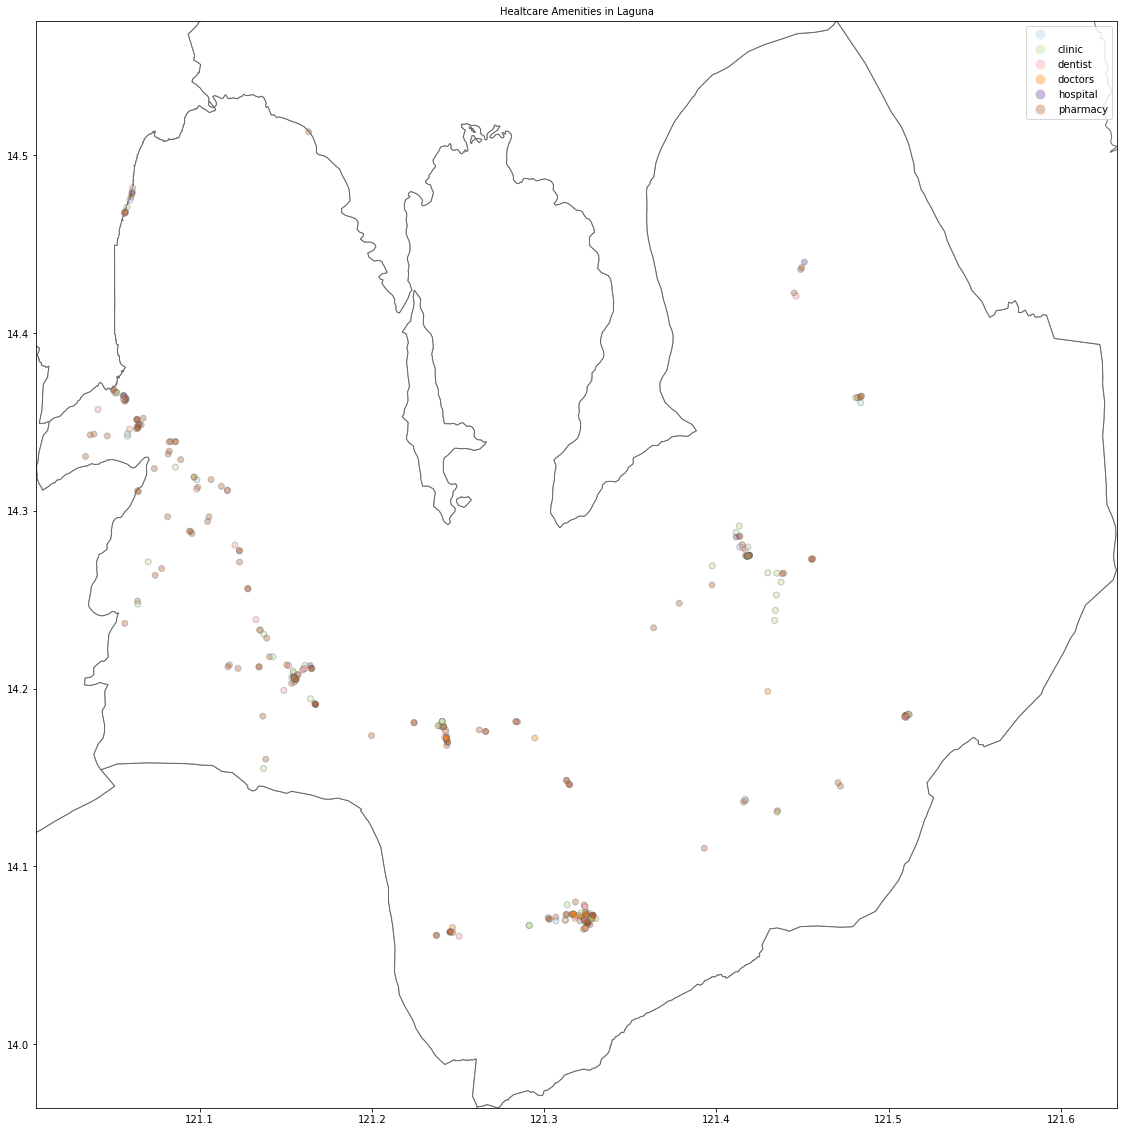

In [10]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.set_title('Healtcare Amenities in Laguna', fontsize=10)
ax.set_xlim(lgn.bounds.iloc[0]['minx'], lgn.bounds.iloc[0]['maxx'])
ax.set_ylim(lgn.bounds.iloc[0]['miny'], lgn.bounds.iloc[0]['maxy'])
lgn_hp = gpd.overlay(hp_points, lgn, how='intersection')
ph.plot(ax=ax, color='white', edgecolor='dimgray')
lgn_hp.plot(ax=ax, column="amenity", edgecolor='dimgray', cmap="Paired", alpha=0.35, legend=True)

Now let's plot the map by health-related amenities.

In [17]:
hp_points['amenity'].unique()

array(['pharmacy', 'doctors', 'clinic', 'dentist', '', 'hospital',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(ncols=2, sharex=True, sharey=True)
gdf.plot(ax=ax1, column='Value1')
gdf.plot(ax=ax2, column='Value2')

IndexError: index 2 is out of bounds for axis 0 with size 2

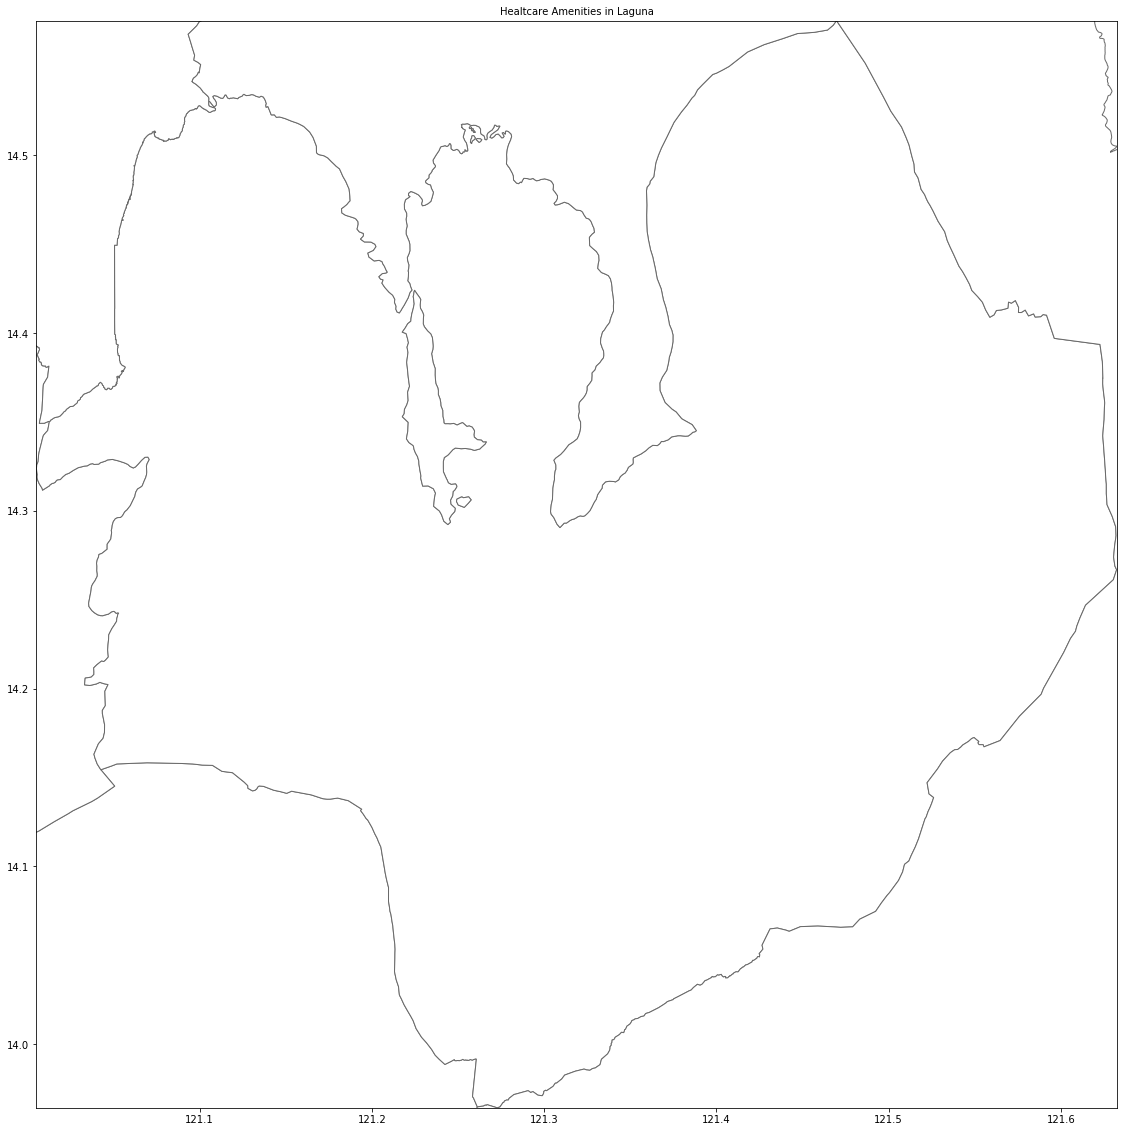

In [18]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.set_title('Healtcare Amenities in Laguna', fontsize=10)
ax.set_xlim(lgn.bounds.iloc[0]['minx'], lgn.bounds.iloc[0]['maxx'])
ax.set_ylim(lgn.bounds.iloc[0]['miny'], lgn.bounds.iloc[0]['maxy'])
lgn_hp = gpd.overlay(hp_points, lgn, how='intersection')
ph.plot(ax=ax, color='white', edgecolor='dimgray')
lgn_hp.plot(ax=ax, column="amenity", edgecolor='dimgray', cmap="Paired", alpha=0.35, legend=True, subplots=True, layout=(3,3))

Let's count the number of health-related amenities within Metro Manila by getting the shape of `mm_hp`.

In [11]:
lgn_hp[lgn_hp.osm_type == 'node'].shape[0]

345

With this, there are <b>345</b> health-related amenities within Metro Manila.